# Dataset D5 - HIV

## Importing libraries

In [33]:
from __future__ import division
import pylab as pl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import math
import seaborn as sns
import os

## Data reading and formating - D5 HIV mixture

In [34]:
data_mix = pd.read_csv('../summary_data/D5_HIV_mixture_summary.csv')
data_mix["Trim Effeciency"] = data_mix["Base - TP TRIM"]/(data_mix["Base - TP TRIM"] + data_mix["Base - FP TRIM"])
data_mix['total_corrections']=data_mix['Base - TP']+ data_mix['Base - FP']

## Data reading and formating - D5 HIV diversity

In [35]:
data_div = pd.read_csv('../summary_data/D5_HIV_diversity_summary.csv')
data_div["Trim Effeciency"] = data_div["Base - TP TRIM"]/(data_div["Base - TP TRIM"] + data_div["Base - FP TRIM"])
data_div['total_corrections']=data_div['Base - TP']+ data_div['Base - FP']

## Defining color dictionary

In [36]:
color_dict=dict({'Bfc':'purple','Bless':'orange','Coral':'brown','Fiona':'gray','Lighter':'pink','Musket':'blue','Pollux':'yellow','Racer':'green','Reckoner':'red','Sga':'black'})

## Selecting best kmer for each tool

In [37]:
data_mix_best = data_mix.loc[data_mix.groupby(["Tool","Error"])["Base Gain"].idxmax()]  

<br>
<br>

## Figure S19
Barplot depicting the gain across various error correction methods when applied to D5 HIV mixture dataset.
<br> For each tool, the best k-mer size was selected.


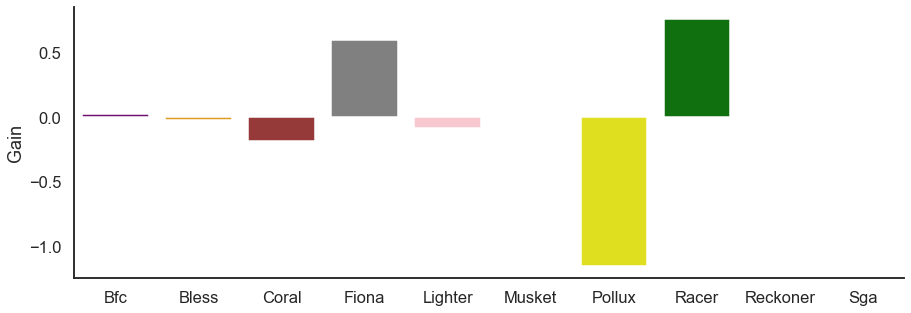

In [38]:
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")

g=sns.catplot(x="Tool",
              y="Base Gain",
              data= data_mix_best.loc[data_mix_best['Error'] == 0.0033],
              kind="bar",
              aspect=2.6, 
              palette=color_dict)


g.set(xlabel='', ylabel='Gain')
sns.despine()

plt.savefig("../figures/D5_HIV/FigS19_gain.png",bbox_inches="tight")
plt.savefig("../figures/D5_HIV/FigS19_gain.pdf",bbox_inches="tight")

<br>
<br>

## Figure S20
Scatter plot depicting the sensitivity (x-axis) and precision (y-axis) of each tool when applied to D5 HIV mixture dataset.
<br>
For each tool, the best k-mer size was selected.


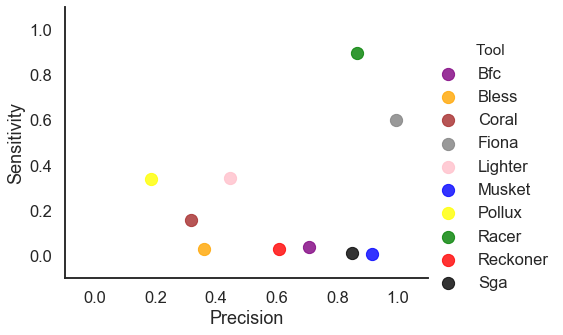

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")


g=sns.lmplot(data = data_mix_best.loc[data_mix_best['Error'] == 0.0033],
             x='Base Precision', 
             y='Base Sensitivity', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 150})

g.set(xlabel='Precision', ylabel='Sensitivity')
plt.ylim(-0.1, 1.1)
plt.xlim(-0.1, 1.1)

g=sns.despine()
plt.savefig("../figures/D5_HIV/FigS20_Precision_vs_Sensitivity.png")
plt.savefig("../figures/D5_HIV/FigS20_Precision_vs_Sensitivity.pdf")

<br>
<br>

## Figure S21
Heatmap depicting the gain across D5 HIV mixture dataset for kmer size set to 20 (with various rates of diversity between haplotypes).

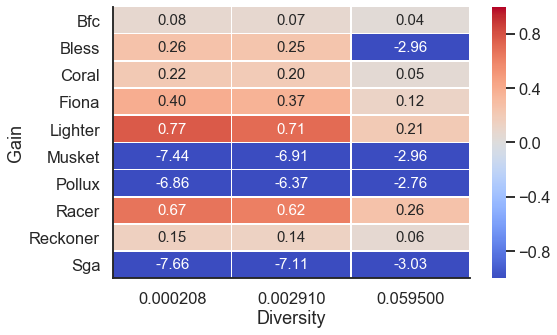

In [40]:
result= data_div.pivot(index='Tool', columns='Diversity', values='Base Gain')\
    .sort_values(by="Tool", ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

g=sns.set_style("white")
g=sns.set_context("talk")

fig, ax = plt.subplots(figsize=(8,5))
g=sns.heatmap(result, 
              annot=True, 
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':15},
              fmt=".2f",
              vmin=-1, 
              vmax=1)

g.set(xlabel='Diversity', ylabel='Gain')
g.set_ylim(0, 10)
sns.despine()
g.set_xticklabels(['{:,.6f}'.format(x) for x in data_div['Diversity']])
plt.xticks(rotation=0) 


plt.savefig("../figures/D5_HIV/FigS21_diversity_haplotypes.png",bbox_inches="tight")
plt.savefig("../figures/D5_HIV/FigS21_diversity_haplotypes.pdf",bbox_inches="tight")

<br>
<br>

## Figure S22
Heatmap depicting the gain across D5 HIV mixture dataset (with various error rates).
<br>For each tool, the best k-mer size was selected.


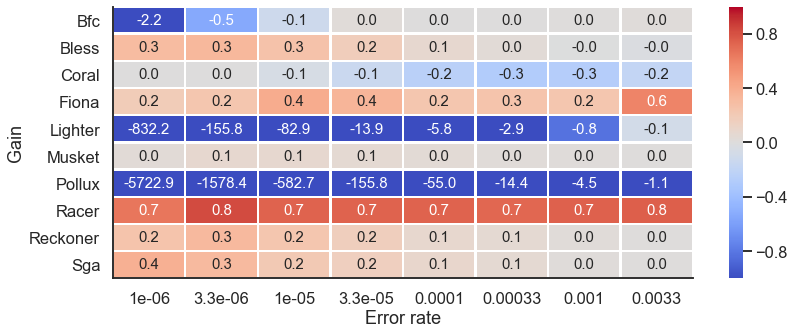

In [41]:
result= data_mix_best.pivot(index='Tool', columns='Error', values='Base Gain')\
    .sort_values(by="Tool", ascending=False)

import matplotlib.pyplot as plt
import seaborn as sns
g=sns.set_style("white")
g=sns.set_context("talk")

fig, ax = plt.subplots(figsize=(13,5))
g=sns.heatmap(result, 
              annot=True, 
              cmap='coolwarm',
              center=0,
              linewidths=1.5,
              annot_kws={'size':15},
              fmt=".1f",
              vmin=-1, 
              vmax=1)

g.set(xlabel='Error rate', ylabel='Gain')
g.set_ylim(0, 10)
g=sns.despine()


plt.savefig("../figures/D5_HIV/FigS22_gain_errors.png",bbox_inches="tight")
plt.savefig("../figures/D5_HIV/FigS22_gain_errors.pdf",bbox_inches="tight")